## Exercise 1: Implement the Logistic Function

In the following, implement the logistic function for binary classification.

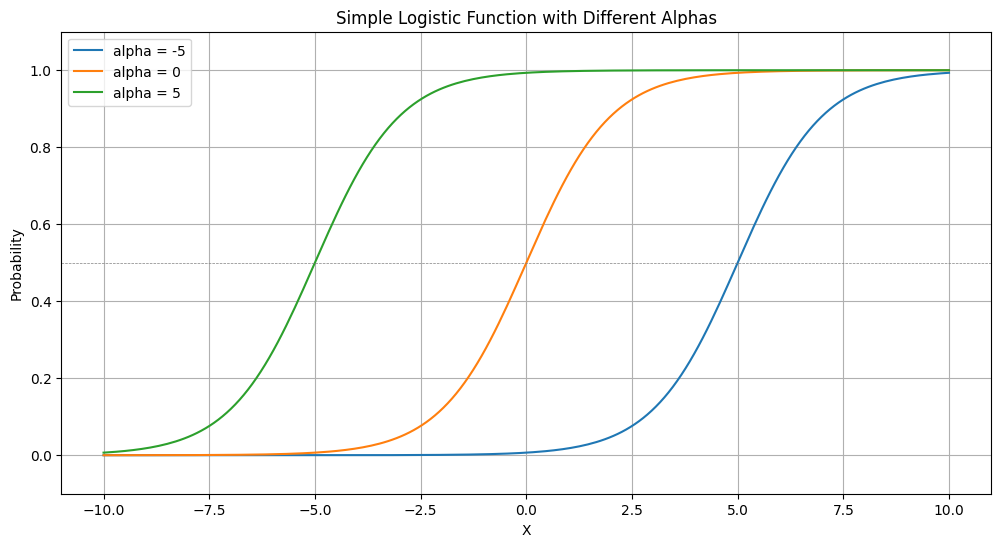

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_function(X, alpha):
    return 1 / (1 + np.exp(-(X + alpha)))

# Graph 1: Modifying alpha (intercept term)
X = np.linspace(-10, 10, 200)  # Generate 200 points between -10 and 10
alphas = [-5, 0, 5]  # Different values of alpha to shift the curve

plt.figure(figsize=(12, 6))

# Plot the logistic function for each alpha
for alpha in alphas:
    plt.plot(X, logistic_function(X, alpha), label=f'alpha = {alpha}')

plt.title('Simple Logistic Function with Different Alphas')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.ylim(-0.1, 1.1)  # Set limits for better visualization
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.5)  # Add a horizontal line at 0.5
plt.show()



## Exercise 2: Create a Logistic Regression class

Use the logistic function above to derive the probabilities inside the `fit` function

In [17]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.multiclass import unique_labels
from sklearn.utils.validation import check_X_y, check_array

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class LogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.01, n_iterations=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.tolerance = tolerance
        self.coef_ = None
        self.intercept_ = None
        self.classes_ = None

    def fit(self, X, y):
        X, y = check_X_y(X, y, ensure_2d=True)
        n_samples, n_features = X.shape
        self.classes_ = unique_labels(y)

        # Initialize parameters
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0

        for _ in range(self.n_iterations):
            # Make predictions
            y_pred = self._predict_proba(X)

            # Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.coef_ -= self.learning_rate * dw
            self.intercept_ -= self.learning_rate * db

            # Check for convergence
            if np.all(np.abs(self.learning_rate * dw) < self.tolerance):
                break

        return self

    def _predict_proba(self, X):
        linear_pred = np.dot(X, self.coef_) + self.intercept_
        return sigmoid(linear_pred)

    def predict_proba(self, X):
        X = check_array(X, ensure_2d=True)
        return self._predict_proba(X)

    def predict(self, X):
        X = check_array(X, ensure_2d=True)
        probs = self._predict_proba(X)
        return np.where(probs>=0.5, self.classes_[1], self.classes_[0])

    def _compute_loss(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    





## Exercise 3: Evaluating a classifier

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

# Load the Titanic dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic = pd.read_csv(url)

# Preprocessing
X = titanic[['Pclass', 'Sex', 'Age', 'Fare']]
y = titanic['Survived']

# Encode 'Sex' column
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# Create preprocessing pipeline
numeric_features = ['Age', 'Fare']
numeric_transformer = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Create the full pipeline
pipeline = make_pipeline(preprocessor, LogisticRegression())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

/tmp/ipykernel_2104/812491423.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})


### Step 1

Use the scikit-learn metrics library to manually calculate precision, recall, confusion matrix, and F1 score for our predictions.

In [19]:
# Your code here
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

print ("Precision", precision_score(y_test, y_pred))
print ("Recall", recall_score(y_test, y_pred))
print ("F1", f1_score(y_test,y_pred))

conf = confusion_matrix(y_test,y_pred)
print("Confusion")
print(conf)

# Hint: Use precision_score, recall_score, confusion_matrix, and f1_score functions

Precision 0.6363636363636364
Recall 0.1044776119402985
F1 0.1794871794871795
Confusion
[[107   4]
 [ 60   7]]


### Step 2

Use cross_val_score to compute the F1 score using 5-fold cross-validation.

In [20]:
# Your code here
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring="f1")
print(cv_scores)
print("Average score", np.mean(cv_scores))
# Hint: Use cross_val_score with cv=5 and scoring='f1'

[0.14285714 0.45360825 0.29213483 0.28235294 0.26829268]
Average score 0.2878491691687594


### Step 3

Use cross_validate with a StratifiedKFold sampler to compute multiple metrics (accuracy, precision, recall, and F1 score) using 5-fold cross-validation.

In [25]:
# Your code here
# Hint: 
# 1. Create a StratifiedKFold object
# 2. Define a dictionary of scoring metrics
# 3. Use cross_validate with the StratifiedKFold object and the scoring dictionary
#from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

#svm = LinearSVC(random_state=0)

skf = StratifiedKFold(n_splits=5)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

cv_results = cross_validate(pipeline, X, y, cv=skf, scoring=scoring)

print("Accuracy:", cv_results['test_accuracy'])
print("Precision:", cv_results['test_precision'])
print("Recall:", cv_results['test_recall'])
print("F1 Score:", cv_results['test_f1'])

Accuracy: [0.59550562 0.70224719 0.6440678  0.65536723 0.66101695]
Precision: [0.53073689 0.72506153 0.63652967 0.67146893 0.70232772]
Recall: [0.59550562 0.70224719 0.6440678  0.65536723 0.66101695]
F1 Score: [0.50564158 0.66288736 0.5816495  0.58464705 0.58304963]


### BONUS

If you finish early, try creating learning curves to visualize how the model's performance changes with increasing amounts of training data.

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Your code here
# Hint:
# 1. Use learning_curve function
# 2. Plot the results using matplotlib

## Exercise 4: Implement Softmax

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(z):
    x = np.exp(z - np.max(z, axis=1, keepdims=True))
    return x/np.sum(x, axis=1, keepdims=True)
   

# Example of how softmax works
example_z = np.array([[1.0, 2.0, 0.5], [-1.0, 0.0, 3.0]])
example_softmax = softmax(example_z)
print("\nSoftmax example:")
print("Input:")
print(example_z)
print("Softmax output:")
print(example_softmax)
print("Sum of probabilities for each row:")
print(np.sum(example_softmax, axis=1))


Softmax example:
Input:
[[ 1.   2.   0.5]
 [-1.   0.   3. ]]
Softmax output:
[[0.2312239  0.62853172 0.14024438]
 [0.01714783 0.04661262 0.93623955]]
Sum of probabilities for each row:
[1. 1.]


## Exercise 5: Implement Multiple Logistic Regression

In [8]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array
from sklearn.preprocessing import LabelEncoder

class LogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.01, n_iterations=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.tolerance = tolerance
        self.coef_ = None
        self.intercept_ = None
        self.classes_ = None
        self.n_classes_ = None
        self.label_encoder = None

    def fit(self, X, y):
        X, y = check_X_y(X, y, ensure_2d=True)
        self.label_encoder = LabelEncoder()
        y_encoded = self.label_encoder.fit_transform(y)
        self.classes_ = self.label_encoder.classes_
        self.n_classes_ = len(self.classes_)

        n_samples, n_features = X.shape

        # Initialize parameters
        self.coef_ = np.zeros((self.n_classes_, n_features))
        self.intercept_ = np.zeros(self.n_classes_)

        # Convert y to one-hot encoding
        y_onehot = np.eye(self.n_classes_)[y_encoded]


        # What goes here?
        for _ in range(self.n_iterations):
            # Make predictions
            y_pred = self._predict_proba(X)

            # Calculate gradients (THIS CODE SECTION IS ALL GRADIENT DESCENT IS)
            # gradient is y_pred - y
            # multiple error by x
            error = y_pred - y
            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1 / n_samples) * np.sum(error, axis=0)
            # b parameter is just 1 feature (not lots and lots) so we can just do np.sum(error)

            # Update parameters
            self.coef_ -= self.learning_rate * dw
            self.intercept_ -= self.learning_rate * db

            # Check for convergence
            if np.all(np.abs(self.learning_rate * dw) < self.tolerance):
                break

        return self

    def _predict_proba(self, X):
        # What goes here?
        return softmax(X)
        pass

    def predict_proba(self, X):
        X = check_array(X, ensure_2d=True)
        return self._predict_proba(X)

    def predict(self, X):
        X = check_array(X, ensure_2d=True)
        y_pred = np.argmax(self._predict_proba(X), axis=1)
        return self.label_encoder.inverse_transform(y_pred)
